# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [189]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

In [190]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [191]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [192]:
heroes_df.drop('Unnamed: 0', axis = 1, inplace = True) # Drop method drops the specificed column if you specify it 
                                                        # with axis = 1, and inplace basically makes the changes 
                                                        # official without creating a separate copy of the dataframe
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [193]:
display(heroes_df.describe())

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [194]:
powers_df.describe()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Silver Surfer,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


In [195]:
heroes_df.info() # Some NAn values in publisher and weight

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


In [196]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [197]:
heroes_df.info()  # Check by printing out the heroes.info() to check the total counts, and see if any are missing
                   # This confirms that the publisher and the weight columns have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


In [198]:
# Now you want to find the total number of NA values in each column

heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [199]:
# What to do with the missing values in the weight category
# Because it is numerical, we can just find the mean value in the category and just fill in the missing values with the mean

heroes_df.fillna(heroes_df['Weight'].mean(), inplace= True)
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [200]:
# Check to see if powers dataframe have any NA values
powers_df.isna().any()

hero_names               False
Agility                  False
Accelerated Healing      False
Lantern Power Ring       False
Dimensional Awareness    False
                         ...  
Phoenix Force            False
Molecular Dissipation    False
Vision - Cryo            False
Omnipresent              False
Omniscient               False
Length: 168, dtype: bool

In [201]:
powers_df.isna().any().any() # Chain 2 any() to just see if the overall columns contain any NA values or not, instead of
                             # listing them all out False False False etc...

False

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [202]:
# Get rid of duplicate names in the name column
heroes_df.drop_duplicates(subset = 'name', inplace = True) 
heroes_df.reset_index(drop = True, inplace = True) # Reset the index now that name doesn't contain duplicated values
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [203]:
# Rename the 'hero_names' column in powers to 'names', as the other column in heroes_df is called 'names' 
powers_df.rename(columns = {'hero_names': 'names'}, inplace = True)

In [204]:
powers_df = powers_df.astype('str')

In [205]:
# set_index makes the name the index rows, and the power table joins with the heroes table with name as the index as well
heroes_and_powers_df = powers_df.set_index('names').join(heroes_df.set_index('name'), how = 'inner') 
heroes_and_powers_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,False,False,False,True,False,False,False,False,True,False,...,False,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

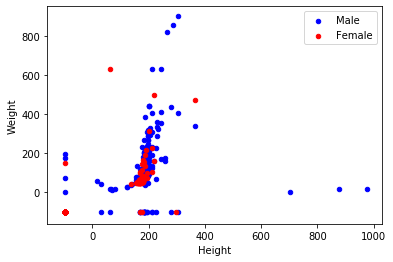

In [206]:
male_heroes_df = heroes_df[heroes_df['Gender'] == 'Male']
female_heroes_df = heroes_df[heroes_df['Gender'] == 'Female']

ax = male_heroes_df.plot.scatter(x='Height', y='Weight', c='blue', label='Male')
female_heroes_df.plot.scatter(x='Height', y='Weight', c='red', label='Female', ax=ax)

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [207]:
male_heroes_df = heroes_df[heroes_df['Gender'] == 'Male']
female_heroes_df = heroes_df[heroes_df['Gender'] == 'Female']


def show_distplot(dataframe, gender, column_name):
    plt.plot()
    dataframe[column_name].hist()
    plt.title('Distribution of {} for {} heroes'.format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel('Population Density')
    plt.show()

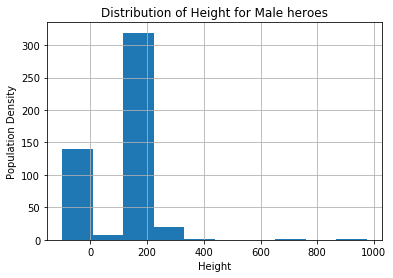

Mean Height of Male Heroes is 109.11201629327903
Median Height of Male Heroes is 180.0


In [208]:
# Male Height
show_distplot(male_heroes_df, 'Male', 'Height')
print("Mean Height of Male Heroes is {}".format(male_heroes_df['Height'].mean()))
print("Median Height of Male Heroes is {}".format(male_heroes_df['Height'].median()))

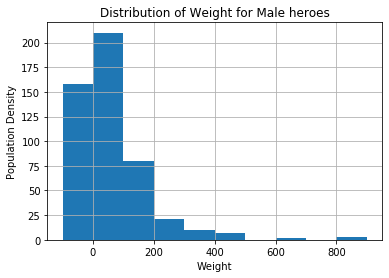

Mean Weight of Male Heroes is 53.519053342681936
Median Weight of Male Heroes is 79.0


In [209]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'Weight')
print("Mean Weight of Male Heroes is {}".format(male_heroes_df['Weight'].mean()))
print("Median Weight of Male Heroes is {}".format(male_heroes_df['Weight'].median()))

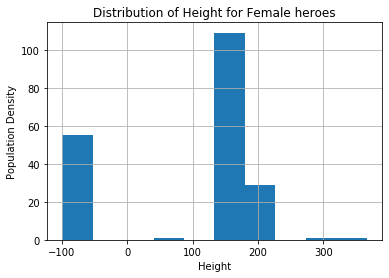

Mean height for female heroes: 97.99234693877551
Median height for female heroes: 168.0


In [210]:
# Female Height
show_distplot(female_heroes_df, 'Female', 'Height')
print('Mean height for female heroes: {}'.format(female_heroes_df.Height.mean()))
print('Median height for female heroes: {}'.format(female_heroes_df.Height.median()))

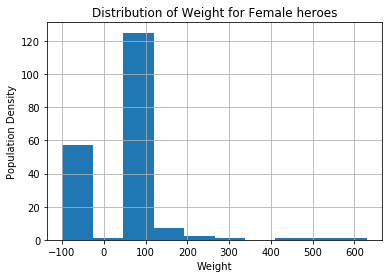

Mean weight for female heroes: 27.433673469387756
Median weight for female heroes: 79.0


In [211]:
# Female Weight
show_distplot(female_heroes_df, 'Female', 'Weight')
print('Mean weight for female heroes: {}'.format(female_heroes_df.Weight.mean()))
print('Median weight for female heroes: {}'.format(male_heroes_df.Weight.median()))

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [433]:
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [432]:
heroes_and_powers_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,False,False,False,True,False,False,False,False,True,False,...,False,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [213]:
def top_5_powers(dataframe):
    df = dataframe.drop(heroes_df.columns.values[1:], axis=1) 
    columns = df.columns.values
    for col in columns:
        df[col] = df[col].map({'True': 1, 'False': 0})
        
    power_counts_dict = dict(df.sum())
    
    return sorted(power_counts_dict.items(), key=lambda x: x[1], reverse=True)[:5] 
    
overall_top_5 = top_5_powers(heroes_and_powers_df)
marvel_df = heroes_and_powers_df[heroes_and_powers_df['Publisher'] == 'Marvel Comics']
dc_df = heroes_and_powers_df[heroes_and_powers_df['Publisher'] == 'DC Comics']
print(overall_top_5)


[('Super Strength', 350), ('Stamina', 281), ('Durability', 251), ('Super Speed', 241), ('Agility', 235)]


In [214]:
marvel_top_5 = top_5_powers(marvel_df)
print(marvel_top_5)

[('Super Strength', 199), ('Durability', 148), ('Stamina', 145), ('Super Speed', 132), ('Agility', 121)]


In [215]:
dc_top_5 = top_5_powers(dc_df)
print(dc_top_5)

[('Super Strength', 103), ('Flight', 83), ('Stamina', 83), ('Super Speed', 75), ('Agility', 68)]


In [216]:
# Pass in a top_5_list and also set publisher to None because you want to account for a non-publisher-related graph
def top_5_bar_chart(top_5_list, publisher = None):
    marvel_powers = [i[0] for i in top_5_list] # Extracts the superpower names in the list
    marvel_values = [i[1] for i in top_5_list] # Extracts the superpower values in the list
    
    plt.clf() # Clears the figure
    plt.figure(figsize = (15, 8)) 
    bar_positions = np.arange(len(marvel_powers)) # Return evenly spaced values within a given interval
    plt.bar(bar_positions, marvel_values) # Set x values to be marvel_powers
    plt.xticks(bar_positions, marvel_powers)
    if publisher: # If you do indicate a publisher, then format it the following way
        plt.title('Top 5 Powers in {} Universe'.format(publisher))
    else: # else if the publisher remains "None", then
        plt.title('Top 5 Powers in the Entire Universe')
    plt.show()    

<Figure size 432x288 with 0 Axes>

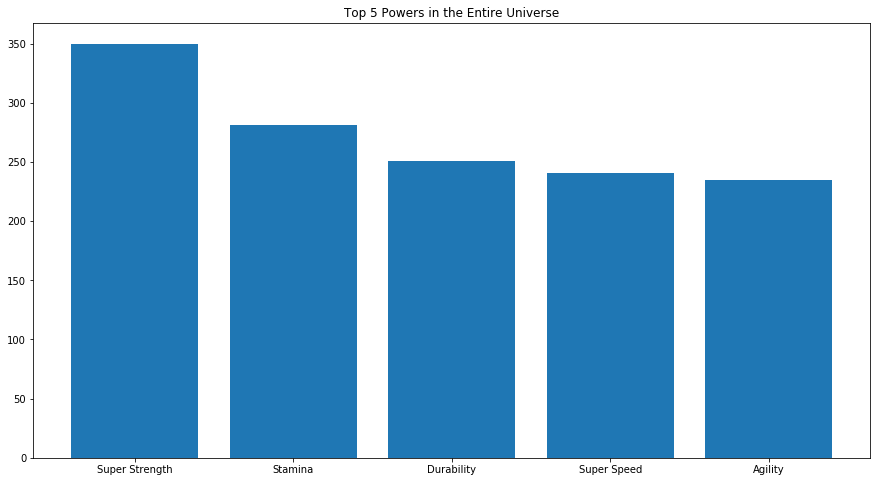

None

<Figure size 432x288 with 0 Axes>

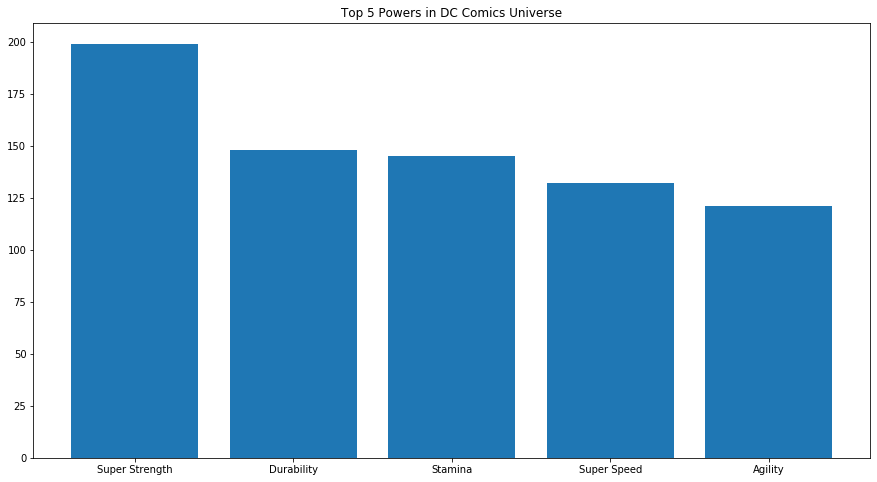

None

<Figure size 432x288 with 0 Axes>

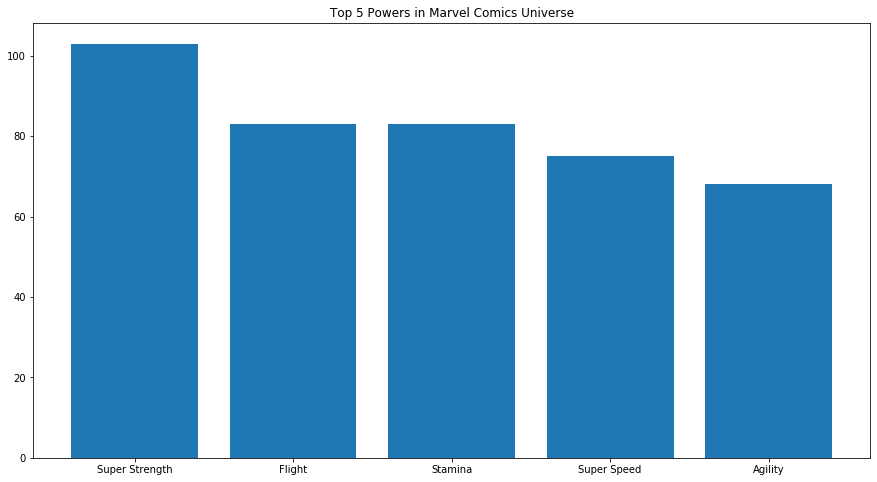

None

In [217]:
display(top_5_bar_chart(overall_top_5))
display(top_5_bar_chart(marvel_top_5, publisher = 'DC Comics'))
display(top_5_bar_chart(dc_top_5, publisher = 'Marvel Comics'))


Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
___________________________________________________________________________________________________________________________

For both universes, the top super power was Super Strength, and agility was the super power which ranked last in both universes. The rest of the super powers were also ranked similarily except for the 2nd best super power, in which DC Comics had Durability and Marvel Comics had Flight as the second best super power. In general, both universes tended to follow the same trend as the entire Superheroes dataset.


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [218]:
heroes_and_powers_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,False,False,False,True,False,False,False,False,True,False,...,False,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [219]:
heroes_and_powers_df.describe()

,Height,Weight
count,643.000000,643.000000
mean,114.364697,53.057092
std,135.654398,132.379800
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,178.000000,65.000000
75%,188.000000,93.500000
max,975.000000,900.000000


In [220]:
heroes_and_powers_df['Height'].isna().sum()

0

In [221]:
heroes_and_powers_df['Height'].isna().sum()

0

In [222]:
heroes_and_powers_df.drop_duplicates(inplace = True) # Drop duplicated rows
heroes_and_powers_df.duplicated().any() # Checks to see if any rows are duplicated

False

In [225]:
heroes_and_powers_df.duplicated()

A-Bomb             False
Abe Sapien         False
Abin Sur           False
Abomination        False
Abraxas            False
                   ...  
Yellowjacket II    False
Ymir               False
Yoda               False
Zatanna            False
Zoom               False
Length: 640, dtype: bool

In [230]:
# Filter out any negative values in Height
positive_values_heroes_and_powers = heroes_and_powers_df.loc[(heroes_and_powers_df['Height'] > 0) & (heroes_and_powers_df['Weight'] > 0)]
positive_values_heroes_and_powers

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Absorbing Man,False,False,False,False,True,True,False,True,False,False,...,False,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellowjacket,False,False,False,False,False,False,False,False,False,False,...,False,Male,blue,Human,Blond,183.0,Marvel Comics,-,good,83.0
Yellowjacket II,False,False,False,False,False,False,False,False,True,False,...,False,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
Yoda,True,False,False,False,False,False,True,False,False,True,...,False,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
Zatanna,False,False,False,False,False,False,False,False,False,False,...,False,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


In [261]:
# Let's compare the average heights of DC and Marvel Superheroes
marvel_and_dc = positive_values_heroes_and_powers[(positive_values_heroes_and_powers['Publisher'] ==  'Marvel Comics') | (positive_values_heroes_and_powers['Publisher'] ==  'DC Comics')]
marvel_and_dc

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Absorbing Man,False,False,False,False,True,True,False,True,False,False,...,False,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
Adam Strange,False,False,False,False,False,True,True,False,True,False,...,False,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X-Man,False,False,False,False,False,False,False,False,True,False,...,False,Male,blue,-,Brown,175.0,Marvel Comics,-,good,61.0
Yellowjacket,False,False,False,False,False,False,False,False,False,False,...,False,Male,blue,Human,Blond,183.0,Marvel Comics,-,good,83.0
Yellowjacket II,False,False,False,False,False,False,False,False,True,False,...,False,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
Zatanna,False,False,False,False,False,False,False,False,False,False,...,False,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


In [306]:
# Now make separate dataframes for dc and marvel, starting with DC comics
dc_df = marvel_and_dc[(marvel_and_dc['Publisher'] == 'DC Comics')]
dc_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Adam Strange,False,False,False,False,False,True,True,False,True,False,...,False,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
Alan Scott,False,False,False,False,False,False,False,False,True,True,...,False,Male,blue,-,Blond,180.0,DC Comics,-,good,90.0
Amazo,True,False,True,False,False,True,False,False,True,False,...,False,Male,red,Android,-,257.0,DC Comics,-,bad,173.0
Animal Man,False,False,False,False,False,False,False,False,False,False,...,False,Male,blue,Human,Blond,183.0,DC Comics,-,good,83.0


In [307]:
marvel_df = marvel_and_dc[(marvel_and_dc['Publisher'] == 'Marvel Comics')]
marvel_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Absorbing Man,False,False,False,False,True,True,False,True,False,False,...,False,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
Agent Bob,False,False,False,False,False,False,True,False,False,False,...,False,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0
Agent Zero,False,False,False,False,False,False,False,True,False,False,...,False,Male,-,-,-,191.0,Marvel Comics,-,good,104.0


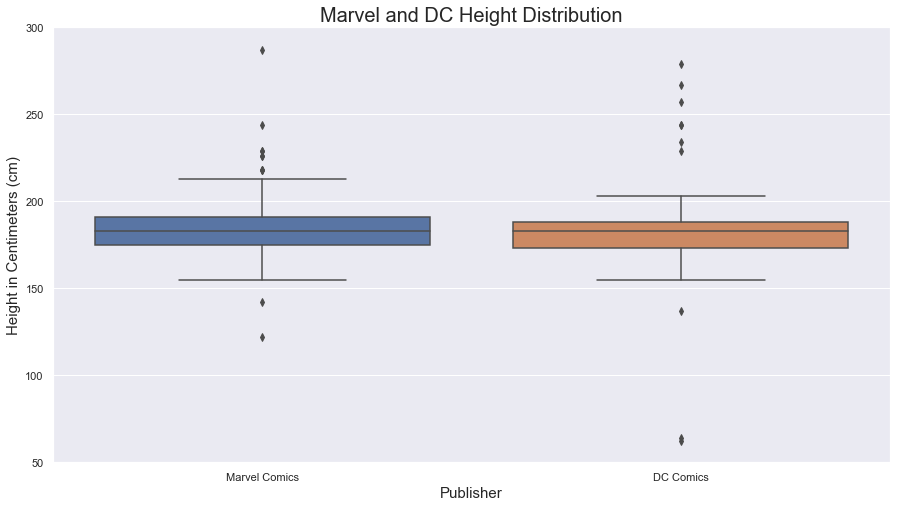

In [358]:
plt.figure(figsize = (15, 8))

sns.boxplot(x = marvel_and_dc['Publisher'], y = marvel_and_dc['Height'], data = marvel_and_dc)
sns.set(style = 'darkgrid')
plt.ylim(50, 300)
plt.xlabel('Publisher', fontsize = 15)
plt.ylabel('Height in Centimeters (cm)', fontsize = 15)
plt.title('Marvel and DC Height Distribution', fontsize = 20,)
plt.show()

In [325]:
print('The Average Height Overall is {} Centimeters'.format(marvel_and_dc['Height'].mean()))
print('The Average Height in the Marvel Universe is {} Centimeters'.format(marvel_df['Height'].mean()))
print('The Average Height in the DC Universe is {} Centimeters'.format(dc_df['Height'].mean()))

The Average Height Overall is 188.75342789598108 Centimeters
The Average Height in the Marvel Universe is 191.82260273972602 Centimeters
The Average Height in the DC Universe is 181.91221374045801 Centimeters


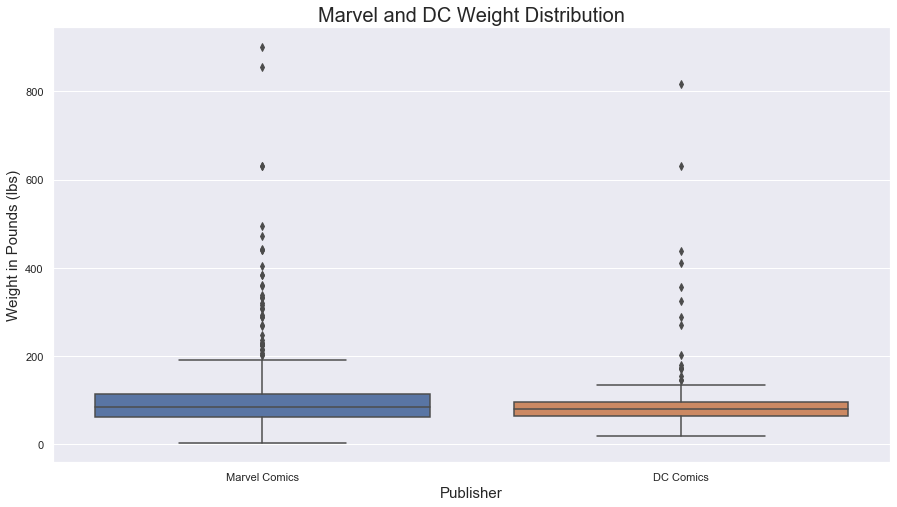

In [360]:
plt.figure(figsize = (15, 8))

sns.boxplot(x = marvel_and_dc['Publisher'], y = marvel_and_dc['Weight'], data = marvel_and_dc)
sns.set(style = 'darkgrid')
plt.ylim()
plt.xlabel('Publisher', fontsize = 15)
plt.ylabel('Weight in Pounds (lbs)', fontsize = 15)
plt.title('Marvel and DC Weight Distribution', fontsize = 20,)
plt.show()

In [361]:
print('The Average Weight Overall is {} Pounds'.format(marvel_and_dc['Weight'].mean()))
print('The Average Weight in the Marvel Universe is {} Pounds'.format(marvel_df['Weight'].mean()))
print('The Average Weight in the DC Universe is {} Pounds'.format(dc_df['Weight'].mean()))

The Average Weight Overall is 115.52955082742317 Pounds
The Average Weight in the Marvel Universe is 120.14041095890411 Pounds
The Average Weight in the DC Universe is 105.25190839694656 Pounds


Text(0.5, 1.0, 'Overall Relationship Between Height and Weight')

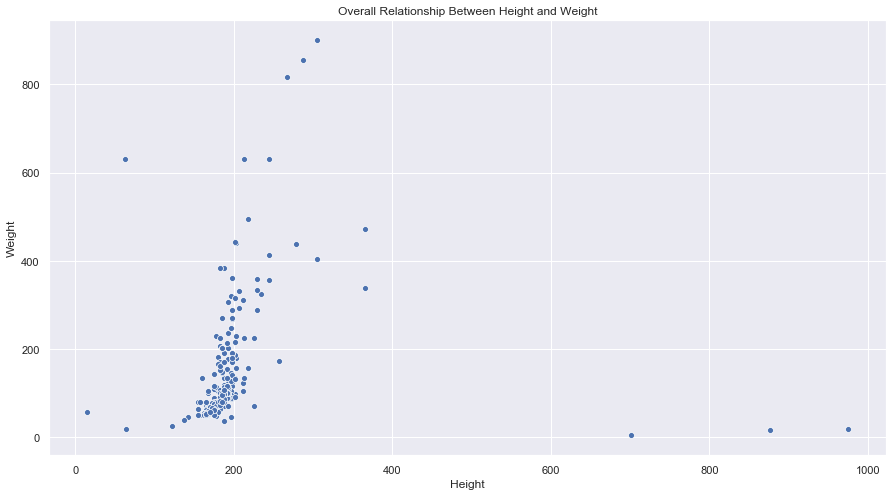

In [370]:
# Is there a relationship between weight and height? 
plt.figure(figsize = (15, 8))

sns.scatterplot(x = marvel_and_dc['Height'], y = marvel_and_dc['Weight'])
plt.title('Overall Relationship Between Height and Weight')


Text(0.5, 1.0, 'Marvel Comics Height and Weight Relationship')

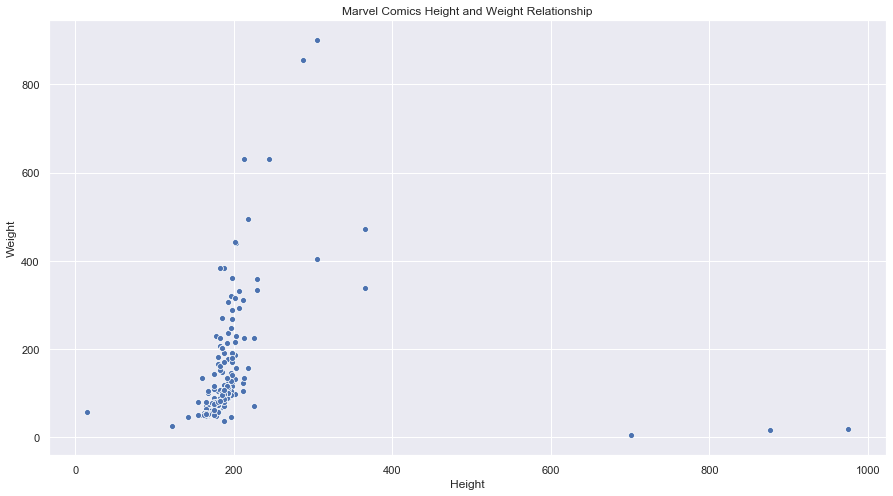

In [416]:
plt.figure(figsize = (15, 8))

sns.scatterplot(x = marvel_df['Height'], y = marvel_df['Weight'])
plt.title('Marvel Comics Height and Weight Relationship')

Text(0.5, 1.0, 'DC Comics Height and Weight Relationship')

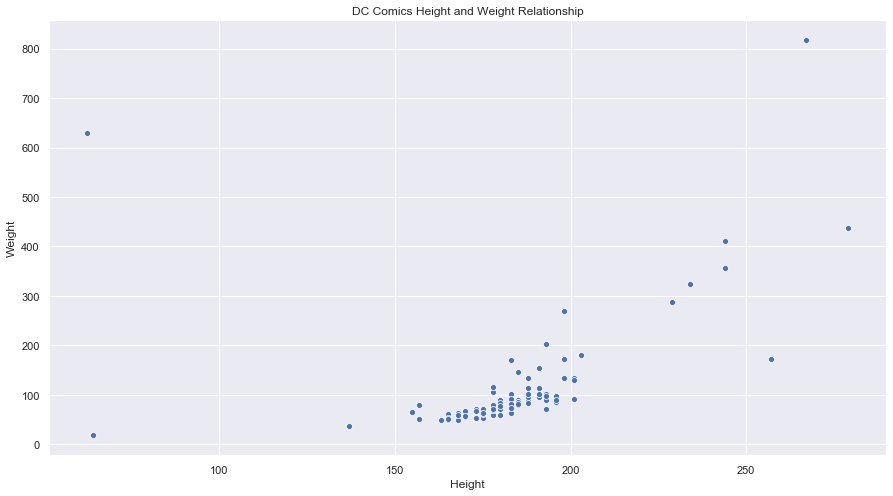

In [417]:
plt.figure(figsize = (15, 8))

sns.scatterplot(x = dc_df['Height'], y = dc_df['Weight'])
plt.title('DC Comics Height and Weight Relationship')

It appears that both DC and Marvel Comics Universe have a relatively positive correlation between height and weight. Overall, the relationship between height and weight seems to be positively correlated